In [6]:
# loading in all the essentials for data manipulation
import pandas as pd
#load inthe NTLK stopwords to remove articles, preposition and other words that are not actionable
from nltk.corpus import stopwords, reuters
# This allows to create individual objects from a bog of words
from nltk.tokenize import word_tokenize
# Lemmatizer helps to reduce words to the base form
from nltk.stem import WordNetLemmatizer
# Ngrams allows to group words in common pairs or trigrams..etc
from nltk import download, word_tokenize, ngrams
# We can use counter to count the objects
from collections import Counter
# This is our visual library
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
download('reuters')  # download sample text
download('punkt')  # download tokenizer
download('stopwords')  # download stopwords
download('wordnet')  # download lemmatizer

[nltk_data] Downloading package reuters to /Users/rami/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to /Users/rami/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/rami/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/rami/nltk_data...


True

In [3]:
def word_frequency(sentence):
    # joins all the sentenses
    sentence =" ".join(sentence)
    # creates tokens, creates lower class, removes numbers and lemmatizes the words
    new_tokens = word_tokenize(sentence)
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
    # counts the words, pairs and trigrams
    counted = Counter(new_tokens)
    counted_2= Counter(ngrams(new_tokens,2))
    counted_3= Counter(ngrams(new_tokens,3))
    # creates 3 data frames and returns them
    word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
    word_pairs =pd.DataFrame(counted_2.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)
    trigrams =pd.DataFrame(counted_3.items(),columns=['trigrams','frequency']).sort_values(by='frequency',ascending=False)
    return word_freq,word_pairs,trigrams

In [7]:
# Use reuters text as a sample
text = reuters.raw(categories='crude')
sentences = text.split('\n')  # split text into sentences

In [8]:
# Get word frequencies
word_freq, word_pairs, trigrams = word_frequency(sentences)

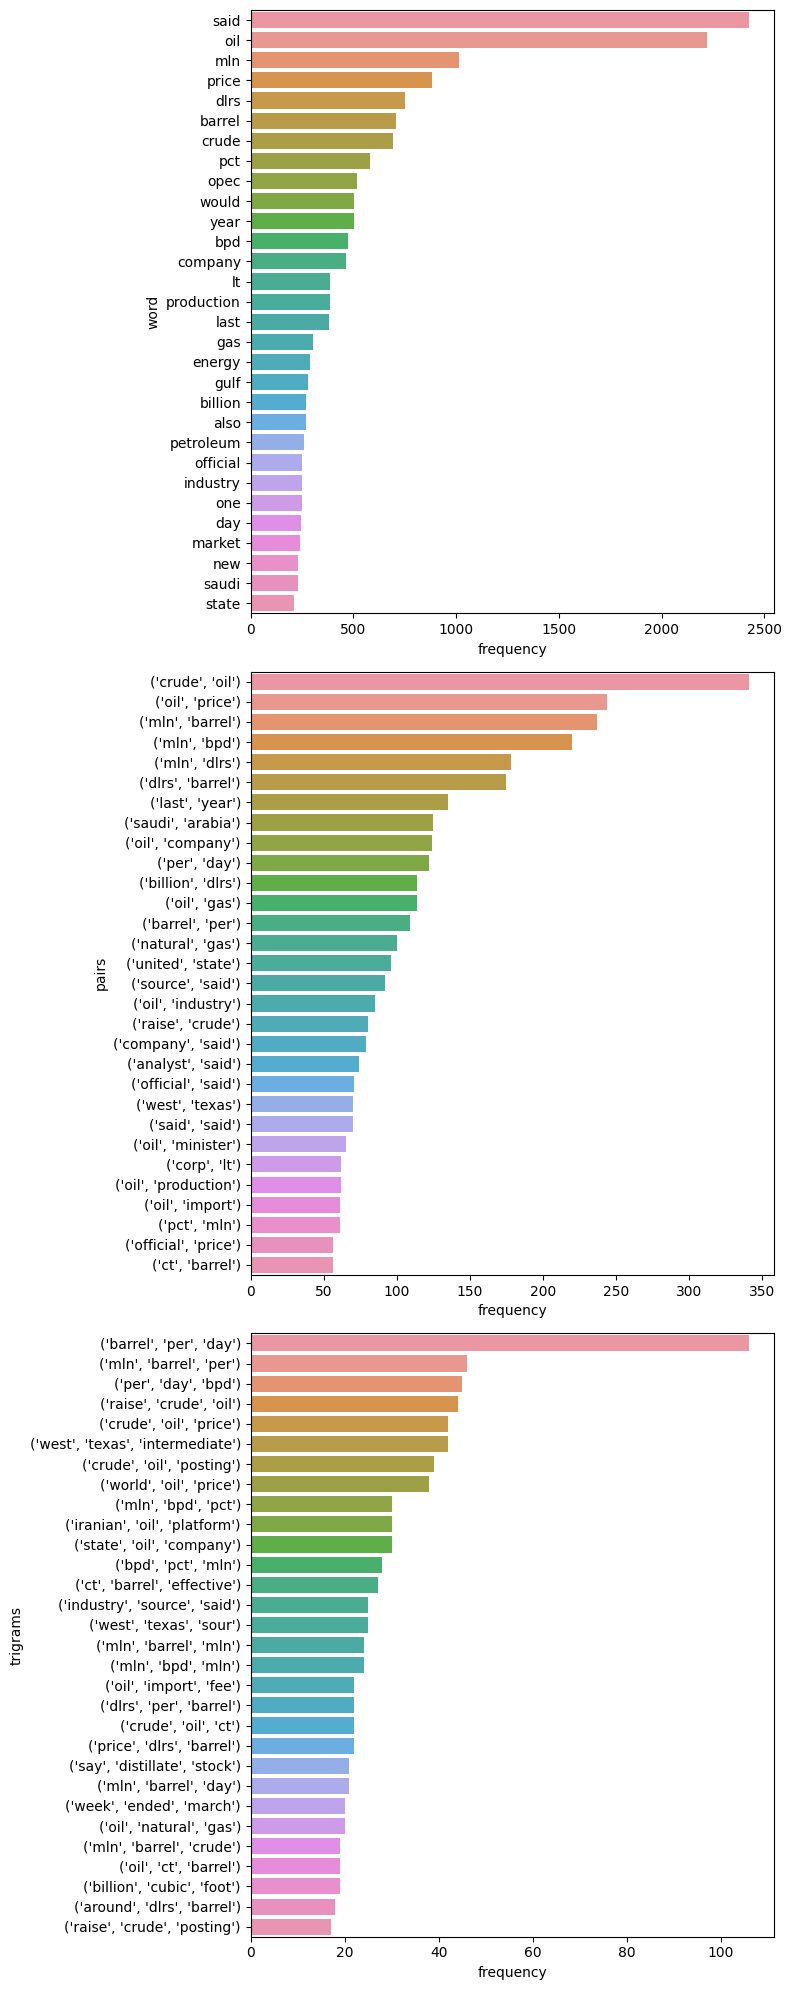

In [9]:
# Visualize frequencies
fig, axes = plt.subplots(3, 1, figsize=(8, 20))
sns.barplot(ax=axes[0], x='frequency', y='word', data=word_freq.head(30))
sns.barplot(ax=axes[1], x='frequency', y='pairs', data=word_pairs.head(30))
sns.barplot(ax=axes[2], x='frequency', y='trigrams', data=trigrams.head(30))

plt.tight_layout()
plt.show()